## TODO:

1. incorporate `PrettyDuration` into `JagularFileMap` and update `__repr__` [DONE!]
1. split out `pairwise` and `is_sorted` to `utils` [DONE!]
1. fix issue of `header_size`
1. fix test data [DONE!]
1. write actual utiity function to return data and/or list of required files
1. finish `NotImplementedError` functions
1. deal with duplicates, and overlaps
1. consider graceful abort?
1. FFB! Provide way to request specific channel(s) and provide for inter-file interpolation (default should maybe return all channels?)
1. ...?

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import jagular as jag

In [3]:
file_list = ['../sample_data/sample_data_1.rec',
             '../sample_data/sample_data_3.rec',
             '../sample_data/sample_data_4.rec',
             '../sample_data/sample_data_5.rec',
             '../sample_data/sample_data_2.rec'
            ]

jfm = jag.io.JagularFileMap(file_list)

print(jfm)

<JagularFileMap: 5 files spanning 9:45:54:849 hours (missing 52:19:480 minutes)> at 0x23c63487c88


In [5]:
for ts, ch_data in jfm.read_stitched_files(block_size=4):
    print(ts)

[200917, 55205700, 55205701, 55205702]
[55205703, 55205704, 55205705, 55205706]
[55205707, 55205708, 190383308, 216003235]
[45380179, 45380180, 45380181, 45380182]
[45380183, 45380184, 45380185, 45380186]
[45380187, 430419684, 428619684, 55912384]
[55912385, 55912386, 55912387, 55912388]
[55912389, 55912390, 55912391, 55912392]
[617928812, 648279793, 23871545, 23871546]
[23871547, 23871548, 23871549, 23871550]
[23871551, 23871552, 23871553, 824383837]
[864397337, 23104817, 23104818, 23104819]
[23104820, 23104821, 23104822, 23104823]


In [4]:
jag.io.JagularFileMap('../sample_data/sample_data_1.rec')

<JagularFileMap: 1 files spanning 1:45:39:413 hours (missing 0.0 milliseconds)> at 0x1dd33b3ada0

In [5]:
jfm.timestamps

array([[  6.69723333e+00,   6.34611027e+03],
       [  7.20010783e+03,   1.43473228e+04],
       [  1.42873228e+04,   2.05976271e+04],
       [  2.16093264e+04,   2.74794612e+04],
       [  2.88132446e+04,   3.51615471e+04]])

In [6]:
jfm.timesamples

array([[    200917,  190383308],
       [ 216003235,  430419684],
       [ 428619684,  617928812],
       [ 648279793,  824383837],
       [ 864397337, 1054846413]])

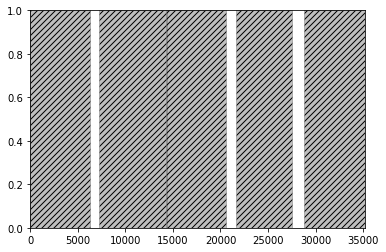

In [7]:
ax = jfm.plot()
# ax.set_xlim(0, 300);

In [8]:
jfm._samples_within_bounds(2853122, 7093204 )

True

In [9]:
jfm._time_within_bounds(100, 250)

True

In [10]:
print("duration including gaps: {}".format(jfm.duration_w_gaps))
print("duration excluding gaps: {}".format(jfm.duration_wo_gaps))

duration including gaps: 9:45:54:849 hours
duration excluding gaps: 8:53:35:369 hours


In [11]:
# 4, 4, 2, 5

# chunksize = 4*4
# chunksize = 3*4

In [46]:
with open('test1', 'w') as f:
    f.write('f1b1f1b2f1b3f1b4')
    
with open('test2', 'w') as f:
    f.write('f2b1f2b2f2b3f2b4')
    
with open('test3', 'w') as f:
    f.write('f3b1f3b2')
    
with open('test4', 'w') as f:
    f.write('f4b1f4b2f4b3f4b4f4b5')

def read_stitched_files(nch=2):
    with open('test1', 'r') as f1, open('test2', 'r') as f2, open('test3', 'r') as f3, open('test4', 'r') as f4:
        while True:
            chunk = f1.read(4*nch)
            if chunk:
                yield chunk
            else:
                chunk = f2.read(4*nch)
                if chunk:
                    yield chunk
                else:
                    chunk = f3.read(4*nch)
                    if chunk:
                        yield chunk
                    else:
                        chunk = f4.read(4*nch)
                        if chunk:
                            yield chunk
                        else:
                            return
                        
for chunk in read_stitched_files(4):
    print(chunk)

f1b1f1b2f1b3f1b4
f2b1f2b2f2b3f2b4
f3b1f3b2
f4b1f4b2f4b3f4b4
f4b5


In [69]:
from contextlib import ExitStack

with open('test1', 'w') as f:
    f.write('f1b1f1b2f1b3f1b4')
    
with open('test2', 'w') as f:
    f.write('f2b1f2b2f2b3f2b4')
    
with open('test3', 'w') as f:
    f.write('f3b1f3b2')
    
with open('test4', 'w') as f:
    f.write('f4b1f4b2f4b3f4b4f4b5')
    
filenames = ['test1', 'test2', 'test3', 'test4']

def read_stitched_files(nch=2):
    with ExitStack() as stack:
        files = [stack.enter_context(open(fname, 'r')) for fname in filenames]
        ii=0
        while True:
            try:
                chunk = files[ii].read(4*nch)
                if chunk:
                    yield chunk
                else:
                    ii+=1
            except IndexError:
                return
                       
for chunk in read_stitched_files(4):
    print(chunk)

f1b1f1b2f1b3f1b4
f2b1f2b2f2b3f2b4
f3b1f3b2
f4b1f4b2f4b3f4b4
f4b5


In [83]:
from contextlib import ExitStack

with open('test1', 'w') as f:
    f.write('f1b1f1b2f1b3f1b4')
    
with open('test2', 'w') as f:
    f.write('f2b1f2b2f2b3f2b4')
    
with open('test3', 'w') as f:
    f.write('f3b1f3b2')
    
with open('test4', 'w') as f:
    f.write('f4b1f4b2f4b3f4b4f4b5')
    
filenames = ['test1', 'test2', 'test3', 'test4']

from contextlib import ExitStack

def read_stitched_files(nch=2):
    with ExitStack() as stack:
        files = [stack.enter_context(open(fname, 'r')) for fname in filenames]
        ii=0
        while True:
            try:
                chunk = files[ii].read(4*nch)
                if 0 < len(chunk) < 4*nch:
                    # chunk size could not be filled from current file, so move onto next file
                    ii+=1
                    chunkB = files[ii].read(4*int(nch-len(chunk)/4))
                    chunk = chunk + chunkB
                if chunk:
                    yield chunk
                else:
                    ii+=1
            except IndexError:
                return
                       
for chunk in read_stitched_files(3):
    print(chunk)

f1b1f1b2f1b3
f1b4f2b1f2b2
f2b3f2b4f3b1
f3b2f4b1f4b2
f4b3f4b4f4b5


In [82]:
with open('test1', 'w') as f:
    f.write('f1b1f1b2f1b3f1b4')
with open('test2', 'w') as f:
    f.write('f2b1f2b2f2b3f2b4')
with open('test3', 'w') as f:
    f.write('f3b1f3b2')   
with open('test4', 'w') as f:
    f.write('f4b1f4b2f4b3f4b4f4b5')

print('')
print('One symbol at a time:')
print('=======================')
for chunk in read_stitched_files(1):
    print(chunk)
    
print('')
print('Two symbols at a time:')
print('=======================')
for chunk in read_stitched_files(2):
    print(chunk)
    
print('')
print('Three symbols at a time:')
print('=======================')
for chunk in read_stitched_files(3):
    print(chunk)
    
print('')
print('Four symbols at a time:')
print('=======================')
for chunk in read_stitched_files(4):
    print(chunk)
    
print('')
print('Five symbols at a time:')
print('=======================')
for chunk in read_stitched_files(5):
    print(chunk)
    
print('')
print('Six symbols at a time:')
print('=======================')
for chunk in read_stitched_files(6):
    print(chunk)


One symbol at a time:
f1b1
f1b2
f1b3
f1b4
f2b1
f2b2
f2b3
f2b4
f3b1
f3b2
f4b1
f4b2
f4b3
f4b4
f4b5

Two symbols at a time:
f1b1f1b2
f1b3f1b4
f2b1f2b2
f2b3f2b4
f3b1f3b2
f4b1f4b2
f4b3f4b4

Three symbols at a time:
f1b1f1b2f1b3
f1b4f2b1f2b2
f2b3f2b4f3b1
f3b2f4b1f4b2
f4b3f4b4f4b5

Four symbols at a time:
f1b1f1b2f1b3f1b4
f2b1f2b2f2b3f2b4
f3b1f3b2f4b1f4b2

Five symbols at a time:
f1b1f1b2f1b3f1b4f2b1
f2b2f2b3f2b4f3b1f3b2
f4b1f4b2f4b3f4b4f4b5

Six symbols at a time:
f1b1f1b2f1b3f1b4f2b1f2b2
f2b3f2b4f3b1f3b2


In [12]:
A = np.zeros((3,6))
A

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [25]:
A = [1,2,3,4,5]

In [26]:
A + A

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]